In [1]:
#Estadistica Aplicada III
#Proyecto !
#Luis Edmundo Gatica Norato, CU: 150703

In [2]:
from matplotlib import pyplot
from matplotlib.widgets import Slider
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
X = np.zeros((2091,32256))

In [4]:
for j in range (1,40):
    if(j!=14):
        if(j<10):
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB0"+str(j)+"/"
        else:
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB"+str(j)+"/"
        for i in range(1,56):
            im = Image.open(path+str(i)+".pgm")
            aux = np.asarray(im.getdata())
            aux = np.transpose(aux)
            if(j<14):
                X[(j-1)*55+i-1] = aux
            else:
                X[(j-2)*55+i-1] = aux
    
    

In [5]:
X_hat = X.mean(axis=0)
len(X_hat)
X = X - X_hat

In [6]:
pca = PCA(n_components = 20)
principalComponents = pca.fit_transform(X)

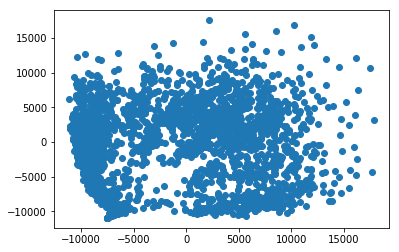

In [10]:
from sklearn.preprocessing import normalize

np.shape(principalComponents)
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.show()

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


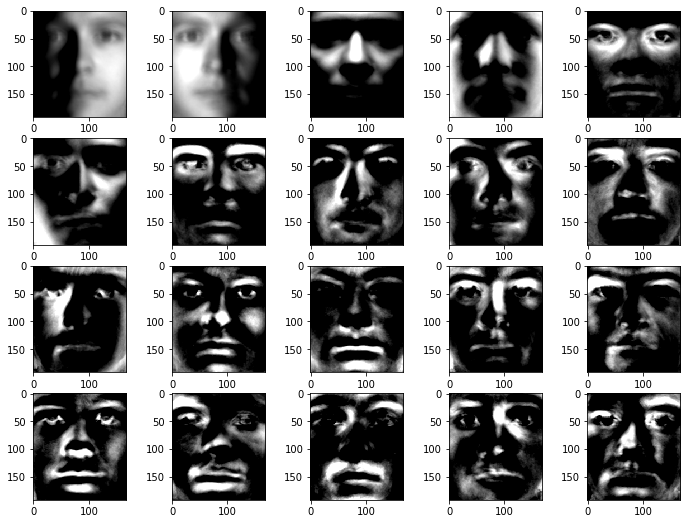

In [11]:
fig,axes = plt.subplots( 4,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(25500*pca.components_[i,:])
    iax.imshow(im)
fig.show()

In [13]:
im.putdata(X_hat)
im.show()

In [14]:
np.sum(pca.explained_variance_ratio_)

0.8928850795310281

In [15]:
principalDf = pd.DataFrame(data = pca.explained_variance_ratio_
             , columns = ['Varianza explicada por componente'])
principalDf.head(20)

,Varianza explicada por componente
0,0.407964
1,0.291558
2,0.055283
3,0.027883
4,0.016800
5,0.013653
6,0.010929
7,0.008442
8,0.007884
9,0.007412


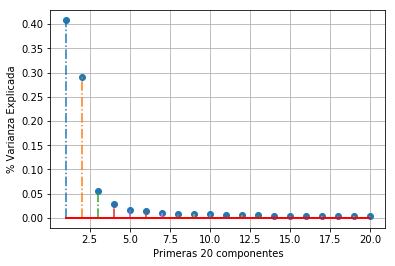

In [16]:
plt.ylabel('% Varianza Explicada')
plt.xlabel('Primeras 20 componentes')
plt.grid(True)
x = np.linspace(1, 20, 20)

markerline, stemlines, baseline = plt.stem(x, pca.explained_variance_ratio_, '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

In [8]:
X_pca = pca.transform(X)
projected = pca.inverse_transform(X_pca)
np.shape(projected)


(2091, 32256)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


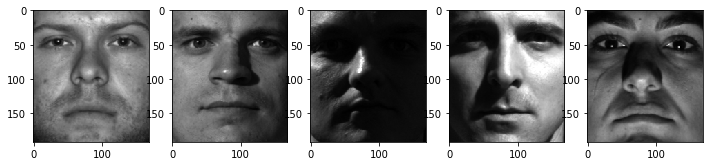

In [18]:
fig,axes = plt.subplots( 1,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(X[i*180,:]+X_hat)
    iax.imshow(im)
fig.show()

0
1
2
3
4


/Users/mundogn/Library/Python/3.7/lib/python/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


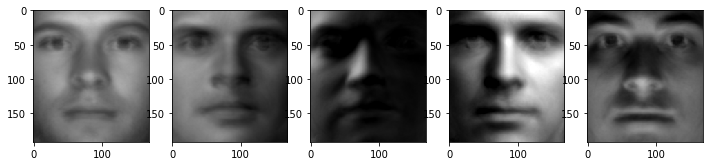

In [13]:
fig,axes = plt.subplots( 1,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(projected[i*180,:]+X_hat)
    print(i)
    iax.imshow(im)
fig.show()

In [ ]:
X_hat = X.mean(axis=1)
im.putdata(X_hat)
im.show()

In [42]:
np.shape(X_pca)

(2280, 5)

In [26]:
from numpy.linalg import norm
cal = np.zeros((2090,1))
for i in range(2090):
    ori = X[i,:]+X_hat
    proy = projected[i,:]+X_hat
    cos = np.dot(proy,ori)/(norm(ori)*norm(proy))
    cal[i] =  cos*cos;

In [27]:

for i in range(5):
    print(cal[i*180])

[0.98234003]
[0.97465205]
[0.87906337]
[0.97124885]
[0.95415782]


In [28]:
np.argmin(cal)

2063

In [24]:
np.arccos(0.9375838)

0.3551803087310033

In [25]:
np.arccos(0.99113068)

0.13328512223006622

In [29]:
im.putdata(projected[2063,:]+X_hat)
im.show()

In [30]:
im.putdata(X[2063,:]+X_hat)
im.show()
